# Analyse Isolated Star Catalog

 work with Weakly_2024_07
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2024/02/25
- update : 2024/02/25


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
#filesource_in="preSourceTable_202312.csv"
filesource_in="isolated_star_cat_202402.csv"

In [3]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [4]:
df = pd.read_csv(filesource_in,index_col=0)

In [5]:
df

,isolated_star_id,ra,dec,primary_band,source_cat_index,nsource,source_cat_index_i,nsource_i,source_cat_index_z,nsource_z,source_cat_index_r,nsource_r,source_cat_index_g,nsource_g,source_cat_index_y,nsource_y,source_cat_index_u,nsource_u,tract
0,108188,253.548157,-8.750126,i,0,10,0,4,4,0,4,4,8,2,10,0,10,0,8188
1,208188,253.492415,-8.747484,i,10,9,10,4,14,0,14,3,17,2,19,0,19,0,8188
2,308188,253.548515,-8.755819,i,19,5,19,4,23,0,23,1,24,0,24,0,24,0,8188
3,408188,253.525449,-8.764117,i,24,10,24,4,28,0,28,4,32,2,34,0,34,0,8188
4,508188,253.512081,-8.804718,i,34,11,34,4,38,0,38,4,42,3,45,0,45,0,8188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,134603864,122.636921,-36.166699,y,152519,1,152519,0,152519,0,152519,0,152519,0,152519,1,152520,0,3864
1346,134703864,122.627452,-36.261952,y,152520,1,152520,0,152520,0,152520,0,152520,0,152520,1,152521,0,3864
1347,134803864,122.584535,-36.077190,y,152521,1,152521,0,152521,0,152521,0,152521,0,152521,1,152522,0,3864
1348,134903864,122.571455,-36.266611,y,152522,1,152522,0,152522,0,152522,0,152522,0,152522,1,152523,0,3864


In [6]:
colnames = list(df.columns)
for name in colnames:
    print(name)

isolated_star_id
ra
dec
primary_band
source_cat_index
nsource
source_cat_index_i
nsource_i
source_cat_index_z
nsource_z
source_cat_index_r
nsource_r
source_cat_index_g
nsource_g
source_cat_index_y
nsource_y
source_cat_index_u
nsource_u
tract


In [7]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [8]:
TRACT_SEL = 3864
df = df[df.tract == TRACT_SEL ]

In [26]:
df_g = df[df.primary_band == "g"]
df_r = df[df.primary_band == "r"]
df_i = df[df.primary_band == "i"]
df_z = df[df.primary_band == "z"]
df_y = df[df.primary_band == "y"]

Text(0.5, 1.0, 'isolated_star_cat_202402.csv in tract 3864')

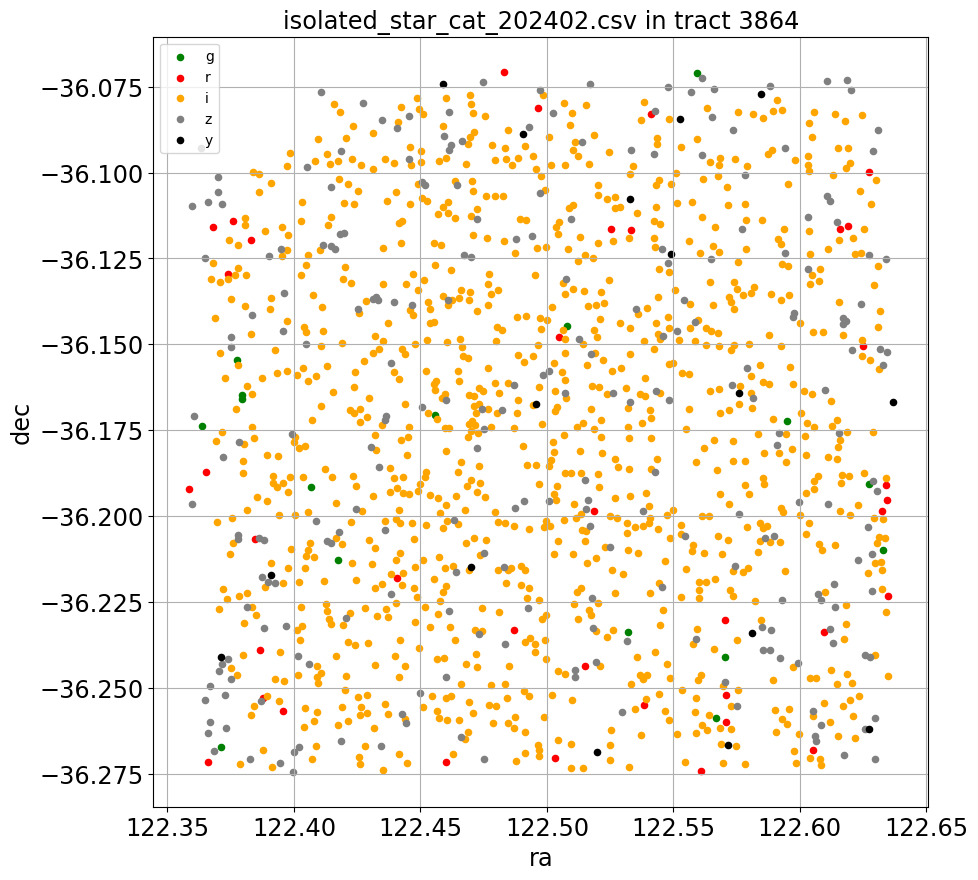

In [28]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,10))
df_g.plot.scatter(x="ra",y="dec",ax=ax,color="g",label="g")
df_r.plot.scatter(x="ra",y="dec",ax=ax,color="r",label="r")
df_i.plot.scatter(x="ra",y="dec",ax=ax,color="orange",label="i")
df_z.plot.scatter(x="ra",y="dec",ax=ax,color="grey",label="z")
df_y.plot.scatter(x="ra",y="dec",ax=ax,color="k",label="y")
ax.grid()
title = f"{filesource_in} in tract {TRACT_SEL}"
ax.set_title(title)